# Load Data 

In [1]:
import pandas as pd

learning_evaluations = pd.read_csv('assessments.csv')
curriculum_details = pd.read_csv('courses.csv')  # DONE
learner_evaluations = pd.read_csv('studentAssessment.csv')  # Rename as needed
learner_profiles = pd.read_csv('studentInfo.csv')
enrollment_records = pd.read_csv('studentRegistration.csv')
interaction_logs = pd.read_csv('studentVle.csv')
learning_materials = pd.read_csv('vle.csv')

# Dictionary with renamed datasets
dataset_dict = {
    'learning_evaluations': learning_evaluations,
    'curriculum_details': curriculum_details,
    'learner_evaluations': learner_evaluations,
    'learner_profiles': learner_profiles,
    'enrollment_records': enrollment_records,
    'interaction_logs': interaction_logs,
    'learning_materials': learning_materials
}


In [2]:
# Merge learner_profiles and enrollment_records to add 'date_registration' for each student
# Dropping 'date_unregistration' as it's not needed

learner_profiles_df = learner_profiles.merge(enrollment_records, how='inner', on=["code_module", "code_presentation", "id_student"])
learner_profiles_df = learner_profiles_df.drop(columns='date_unregistration')  # Removed unregistration info

learner_profiles_df  # Registration info added successfully



,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0


# Analysis of Student Interaction Metrics


This code section performs a series of data transformations and aggregations to analyze student interactions with learning materials based on their click behavior, the number of days they were active, and the learning materials they interacted with. The goal is to compute key metrics like the total and average clicks, the number of days logged, and average clicks per day.

Step-by-Step Explanation:
Aggregating Interaction Data:

python
Copy code
svle = interaction_logs.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': ['mean', 'sum'], 'date': 'nunique', 'id_site': 'nunique'}).reset_index()
The groupby() function groups the data by code_module, code_presentation, and id_student, ensuring the results are student-specific for each module and presentation.
The .agg() function is used to compute:
The mean and total of sum_click for each student, representing their average and total clicks on learning materials.
The nunique() function on date gives the number of unique days a student was active (days_logged).
The nunique() function on id_site gives the number of unique learning materials (material interactions) a student interacted with.
Renaming Aggregated Columns:

python
Copy code
svle.columns = ['code_module', 'code_presentation', 'id_student', 'mean_sum_click', 'total_sum_click', 'unique_date_count', 'unique_id_site_count']
The columns are renamed to more meaningful names:
mean_sum_click: Average number of clicks a student made.
total_sum_click: Total number of clicks.
unique_date_count: Number of unique days the student was active.
unique_id_site_count: Number of unique learning materials interacted with.
Merging Course Data:

python
Copy code
svle = pd.merge(svle, curriculum_details, on=['code_module', 'code_presentation'], how='left')
This merges the svle DataFrame with curriculum_details, which contains additional information about each module and presentation, such as the length of the course (module_presentation_length). The merge is done on code_module and code_presentation.
Calculating Average Clicks Per Day:

python
Copy code
svle['avg click/day'] =  svle['total_sum_click'] / svle['module_presentation_length']
The new column avg click/day is created by dividing the total number of clicks (total_sum_click) by the length of the module (module_presentation_length). This calculates the average number of clicks per day for each student.
Renaming Columns for Clarity:

python
Copy code
svle = svle.rename(columns={'unique_date_count': 'days_logged', 'unique_id_site_count': 'material_interactions', 'module_presentation_length': 'module_length'})
The columns are renamed for better readability:
days_logged: Number of unique days the student was active.
material_interactions: Number of unique learning materials a student interacted with.
module_length: Total length of the module in days.
Final DataFrame Columns:
mean_sum_click: Average number of clicks made by the student.
total_sum_click: Total number of clicks by the student.
days_logged: Number of days the student was active.
material_interactions: Number of unique learning materials interacted with.
module_length: Length of the module.
avg click/day: Average number of clicks per day.


In [3]:
#svle = student_vle.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum().reset_index(name='click sum')
#svle['click mean'] = student_vle.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum()
#svle = student_vle.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': ['mean', 'sum']}).reset_index()
#svle.columns = ['code_module', 'code_presentation', 'id_student', 'mean_sum_click', 'total_sum_click']

svle = interaction_logs.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': ['mean', 'sum'], 'date': 'nunique', 'id_site': 'nunique'}).reset_index()
svle.columns = ['code_module', 'code_presentation', 'id_student', 'mean_sum_click', 'total_sum_click', 'unique_date_count', 'unique_id_site_count']

# Merge svle and courses to get module_presentation_length with respect to: code_module, code_presentation	
svle = pd.merge(svle, curriculum_details, on=['code_module', 'code_presentation'], how='left')

svle['avg click/day'] =  svle['total_sum_click'] / svle['module_presentation_length']

svle = svle.rename(columns={'unique_date_count': 'days_logged', 'unique_id_site_count': 'material_interactions', 'module_presentation_length': 'module_length'})

svle # Added mean_sum_click, total_sum_click, days_logged, material_interactions, module_length, avg click/day

,code_module,code_presentation,id_student,mean_sum_click,total_sum_click,days_logged,material_interactions,module_length,avg click/day
0,AAA,2013J,11391,4.765306,934,40,55,268,3.485075
1,AAA,2013J,28400,3.337209,1435,80,84,268,5.354478
2,AAA,2013J,30268,3.697368,281,12,22,268,1.048507
3,AAA,2013J,31604,3.254902,2158,123,82,268,8.052239
4,AAA,2013J,32885,2.937500,1034,70,66,268,3.858209
...,...,...,...,...,...,...,...,...,...
29223,GGG,2014J,2640965,2.157895,41,5,8,269,0.152416
29224,GGG,2014J,2645731,3.767932,893,45,50,269,3.319703
29225,GGG,2014J,2648187,2.888889,312,24,28,269,1.159851
29226,GGG,2014J,2679821,4.508197,275,13,17,269,1.022305


# Calculating Percentage of Material Interactions
This section of the code calculates the percentage of learning materials that students interacted with based on the total available materials in each module and presentation.

Step-by-Step Explanation:
Counting Unique Learning Materials (id_site):

python
Copy code
vle_n = learning_materials.groupby(['code_module', 'code_presentation'])['id_site'].nunique().reset_index()
The data in learning_materials is grouped by code_module and code_presentation, which represent the course module and its presentation period.
The .nunique() function is applied to id_site to count the number of unique learning materials (e.g., web pages, resources) available in each module and presentation.
The result is a new DataFrame (vle_n) that contains the count of unique learning materials for each combination of module and presentation.
Merging with Student Interaction Data:

python
Copy code
svle = pd.merge(svle, vle_n, on=['code_module', 'code_presentation'], how='left')
The svle DataFrame, which likely contains student interaction data, is merged with vle_n on code_module and code_presentation.
This merge adds the total count of unique learning materials (id_site) for each module and presentation to the corresponding rows in svle.
The how='left' ensures that all rows from svle are retained, even if there’s no matching data in vle_n.
Calculating the Percentage of Material Interactions:

python
Copy code
svle['% material interaction'] =  100 * svle['material_interactions'] / svle['id_site']
A new column % material interaction is created in svle.
This column is calculated by dividing the number of materials a student interacted with (material_interactions) by the total number of available materials (id_site), and then multiplying by 100 to convert it into a percentage.
This gives the percentage of the total available learning materials that a student interacted with during the course.
Final DataFrame Column:
% material interaction: The percentage of learning materials that each student interacted with, relative to the total available materials in the module.
This process allows for evaluating student engagement by showing how much of the course content a student has interacted with, helping identify levels of participation across modules.

In [4]:
# get: id_site, with respect to: code_module, code_presentation	
vle_n = learning_materials.groupby(['code_module', 'code_presentation'])['id_site'].nunique().reset_index()

# Adding in vle to get % of material interactions with the 
svle = pd.merge(svle, vle_n, on=['code_module', 'code_presentation'], how='left')
svle['% material interaction'] =  100*svle['material_interactions'] / svle['id_site']


svle # Added % material interaction 

,code_module,code_presentation,id_student,mean_sum_click,total_sum_click,days_logged,material_interactions,module_length,avg click/day,id_site,% material interaction
0,AAA,2013J,11391,4.765306,934,40,55,268,3.485075,211,26.066351
1,AAA,2013J,28400,3.337209,1435,80,84,268,5.354478,211,39.810427
2,AAA,2013J,30268,3.697368,281,12,22,268,1.048507,211,10.426540
3,AAA,2013J,31604,3.254902,2158,123,82,268,8.052239,211,38.862559
4,AAA,2013J,32885,2.937500,1034,70,66,268,3.858209,211,31.279621
...,...,...,...,...,...,...,...,...,...,...,...
29223,GGG,2014J,2640965,2.157895,41,5,8,269,0.152416,106,7.547170
29224,GGG,2014J,2645731,3.767932,893,45,50,269,3.319703,106,47.169811
29225,GGG,2014J,2648187,2.888889,312,24,28,269,1.159851,106,26.415094
29226,GGG,2014J,2679821,4.508197,275,13,17,269,1.022305,106,16.037736


# Tracking and Merging Assessment Types

This section of code processes and aggregates the different types of assessments (CMA, Exam, TMA) across modules and presentations, and then merges this information with student interaction data.

Step-by-Step Explanation:
Counting Assessment Types:

python
Copy code
assessment_counts = learning_evaluations.groupby(['code_module', 'code_presentation'])['assessment_type'].value_counts().reset_index(name='count')
This line groups the data in learning_evaluations by code_module and code_presentation, which represent the module and its presentation.
The .value_counts() function is applied to the assessment_type column to count how many times each assessment type (e.g., CMA, Exam, TMA) occurs for each module and presentation.
The result is a DataFrame assessment_counts that contains the count of each type of assessment (e.g., how many CMA, Exam, or TMA were used).
Pivoting the Table to Track Assessment Types:

python
Copy code
assessment_pivot = assessment_counts.pivot_table(index=['code_module', 'code_presentation'], columns='assessment_type', values='count', fill_value=0).reset_index()
The pivot_table() function reshapes the assessment_counts DataFrame, creating a separate column for each assessment_type (CMA, Exam, TMA).
The index is set to code_module and code_presentation so that each module and presentation has its own row.
The values parameter uses the count column to fill the table with the number of each type of assessment.
The fill_value=0 ensures that any missing values (where a particular module/presentation doesn't have a certain assessment type) are filled with 0.
The result is assessment_pivot, a table where each row represents a module/presentation, and each column tracks the number of CMA, Exam, and TMA assessments.
Renaming Columns for Clarity:

python
Copy code
assessment_pivot.columns.name = None  
assessment_pivot.columns = ['code_module', 'code_presentation', 'CMA', 'Exam', 'TMA']
This removes the hierarchical column name (if any) and explicitly names the columns as code_module, code_presentation, CMA, Exam, and TMA for clarity.
Merging Assessment Data with Student Interaction Data:

python
Copy code
svle = pd.merge(svle, assessment_pivot, on=['code_module', 'code_presentation'], how='left')
The assessment counts (assessment_pivot) are merged into the svle DataFrame (which contains student interaction data).
The merge is based on code_module and code_presentation, ensuring that the assessment counts for each module and presentation are added to the corresponding rows in svle.
The how='left' ensures that all rows from svle are retained, even if a particular module or presentation doesn’t have any assessments listed in assessment_pivot.
Final DataFrame Columns:
The resulting svle DataFrame now contains the following columns:
CMA: Count of CMA assessments for each module and presentation.
Exam: Count of Exam assessments for each module and presentation.
TMA: Count of TMA assessments for each module and presentation.
By merging these assessment counts, you are enriching the student interaction data with additional information about the types and frequency of assessments in each module. This allows for further analysis, such as how student engagement relates to the number and type of assessments in each course.

In [5]:
# get: assessment_type, with respect to: code_module, code_presentation	
assessment_counts = learning_evaluations.groupby(['code_module', 'code_presentation'])['assessment_type'].value_counts().reset_index(name='count')

# create a table to keep track of # of 'CMA', 'Exam', 'TMA' with respect to: code_module, code_presentation	
assessment_pivot = assessment_counts.pivot_table(index=['code_module', 'code_presentation'], columns='assessment_type', values='count', fill_value=0).reset_index()

# Renaming columns for clarity
assessment_pivot.columns.name = None  
assessment_pivot.columns = ['code_module', 'code_presentation', 'CMA', 'Exam', 'TMA']


#assessment_pivot
svle = pd.merge(svle, assessment_pivot, on=['code_module', 'code_presentation'], how='left')
svle

,code_module,code_presentation,id_student,mean_sum_click,total_sum_click,days_logged,material_interactions,module_length,avg click/day,id_site,% material interaction,CMA,Exam,TMA
0,AAA,2013J,11391,4.765306,934,40,55,268,3.485075,211,26.066351,0.0,1.0,5.0
1,AAA,2013J,28400,3.337209,1435,80,84,268,5.354478,211,39.810427,0.0,1.0,5.0
2,AAA,2013J,30268,3.697368,281,12,22,268,1.048507,211,10.426540,0.0,1.0,5.0
3,AAA,2013J,31604,3.254902,2158,123,82,268,8.052239,211,38.862559,0.0,1.0,5.0
4,AAA,2013J,32885,2.937500,1034,70,66,268,3.858209,211,31.279621,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,GGG,2014J,2640965,2.157895,41,5,8,269,0.152416,106,7.547170,6.0,1.0,3.0
29224,GGG,2014J,2645731,3.767932,893,45,50,269,3.319703,106,47.169811,6.0,1.0,3.0
29225,GGG,2014J,2648187,2.888889,312,24,28,269,1.159851,106,26.415094,6.0,1.0,3.0
29226,GGG,2014J,2679821,4.508197,275,13,17,269,1.022305,106,16.037736,6.0,1.0,3.0


#  Counting Unique Students from the svle DataFrame:
python
Copy code
len(svle['id_student'].unique())
Purpose: This line of code calculates the number of unique students present in the svle DataFrame.
Explanation:
svle['id_student']: Accesses the id_student column in the svle DataFrame, which contains student IDs.
.unique(): Retrieves only the unique values from the id_student column, i.e., the unique student IDs.
len(): Counts the total number of unique student IDs.
2. Counting Unique Students from the learner_profiles DataFrame:
python
Copy code
len(learner_profiles['id_student'].unique())
Purpose: This line of code calculates the number of unique students present in the learner_profiles DataFrame.
Explanation:
learner_profiles['id_student']: Accesses the id_student column in the learner_profiles DataFrame.
.unique(): Extracts the unique student IDs from the column.
len(): Counts the total number of unique student IDs in the learner_profiles DataFrame.
3. Displaying the First Few Rows of the learner_profiles DataFrame (If Defined):
python
Copy code
learner_profiles.head()
Purpose: This command displays the first few rows (default is 5 rows) of the learner_profiles DataFrame to get a preview of the data.
Explanation:
learner_profiles.head(): The .head() function shows the first five rows of the DataFrame, allowing you to quickly inspect the structure and content of the data.

In [6]:
len(svle['id_student'].unique())


26074

In [7]:
len(learner_profiles['id_student'].unique())


28785

In [8]:
learner_profiles

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


# Merging and Reordering Data with Filtering of Withdrawn Students
This section of the code merges two data sets (svle and learner_profiles), reorders columns, and filters out students who have withdrawn from the course.

Step-by-Step Explanation:
Merging Two DataFrames:

python
Copy code
df_all = pd.merge(svle, learner_profiles, on=['code_module', 'code_presentation', 'id_student'], how='inner')
Explanation:
This merges the svle (student interaction data) and learner_profiles (student profile data) DataFrames.
The merge is based on common columns: code_module, code_presentation, and id_student.
The how='inner' specifies an inner join, meaning that only rows where matching values exist in both DataFrames will be retained.
Reordering Columns:

python
Copy code
columns_to_move = ['final_result', 'id_student']
df_all = df_all[columns_to_move + [col for col in df_all.columns if col not in columns_to_move]]
Explanation:
The columns_to_move list specifies the columns (final_result and id_student) that should be moved to the front of the DataFrame.
The next line reorders the columns by placing final_result and id_student at the front while keeping the rest of the columns in their original order.
The expression [col for col in df_all.columns if col not in columns_to_move] ensures that the remaining columns (except final_result and id_student) are appended after the specified columns.
Filtering Out Withdrawn Students:

python
Copy code
df_all = df_all[df_all['final_result'] != 'Withdrawn']
Explanation:
This line filters the DataFrame df_all to exclude rows where the final_result column contains the value 'Withdrawn'.
It ensures that only students who have not withdrawn are included in the analysis.
Final DataFrame (df_all):
After this process, the df_all DataFrame:
Contains merged data from both svle and learner_profiles.
Has the columns final_result and id_student moved to the front.
Excludes any student with a final_result of 'Withdrawn', focusing the data on active students.

In [9]:
df_all = pd.merge(svle, learner_profiles, on=['code_module', 'code_presentation', 'id_student'], how='inner')


columns_to_move = ['final_result', 'id_student']

# Reorder the DataFrame by moving the specified columns to the front
df_all = df_all[columns_to_move + [col for col in df_all.columns if col not in columns_to_move]]
df_all = df_all[df_all['final_result'] != 'Withdrawn'] # remove withdrawn

df_all

,final_result,id_student,code_module,code_presentation,mean_sum_click,total_sum_click,days_logged,material_interactions,module_length,avg click/day,...,Exam,TMA,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,Pass,11391,AAA,2013J,4.765306,934,40,55,268,3.485075,...,1.0,5.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,Pass,28400,AAA,2013J,3.337209,1435,80,84,268,5.354478,...,1.0,5.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
3,Pass,31604,AAA,2013J,3.254902,2158,123,82,268,8.052239,...,1.0,5.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,Pass,32885,AAA,2013J,2.937500,1034,70,66,268,3.858209,...,1.0,5.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N
5,Pass,38053,AAA,2013J,3.381743,2445,143,88,268,9.123134,...,1.0,5.0,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29222,Distinction,2620947,GGG,2014J,2.629834,476,35,48,269,1.769517,...,1.0,3.0,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y
29223,Fail,2640965,GGG,2014J,2.157895,41,5,8,269,0.152416,...,1.0,3.0,F,Wales,Lower Than A Level,10-20,0-35,0,30,N
29224,Distinction,2645731,GGG,2014J,3.767932,893,45,50,269,3.319703,...,1.0,3.0,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N
29225,Pass,2648187,GGG,2014J,2.888889,312,24,28,269,1.159851,...,1.0,3.0,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y


# Inspecting the Structure of the DataFrame
This code provides a summary of the df_all DataFrame, showing key information about its structure and the data it contains.

Step-by-Step Explanation:
python
Copy code

df_all.info()
Purpose: This line of code is used to generate a concise summary of the DataFrame df_all. It gives an overview of the structure of the data, including the number of entries, columns, and their data types.

Explanation:

df_all.info(): This function outputs a detailed summary of the DataFrame, showing:
Number of rows: The total number of entries in the DataFrame, often referred to as the number of rows.
Number of columns: The total number of columns or features in the DataFrame.
Column names: The names of each column, listed in the order they appear in the DataFrame.
Data types: The type of data each column holds, such as int64, float64, object, etc.
Non-null counts: The number of non-null (non-missing) values in each column, which helps to identify any missing data that needs to be handled.
Memory usage: The amount of memory being used to store the DataFrame.

In [10]:
df_all.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22060 entries, 0 to 29227
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   final_result            22060 non-null  object 
 1   id_student              22060 non-null  int64  
 2   code_module             22060 non-null  object 
 3   code_presentation       22060 non-null  object 
 4   mean_sum_click          22060 non-null  float64
 5   total_sum_click         22060 non-null  int64  
 6   days_logged             22060 non-null  int64  
 7   material_interactions   22060 non-null  int64  
 8   module_length           22060 non-null  int64  
 9   avg click/day           22060 non-null  float64
 10  id_site                 22060 non-null  int64  
 11  % material interaction  22060 non-null  float64
 12  CMA                     22060 non-null  float64
 13  Exam                    22060 non-null  float64
 14  TMA                     22060 non-null  flo

# Mapping Categorical Data to Numerical Values
This section of the code converts categorical data in the DataFrame df_all into numerical values by using predefined mapping dictionaries. The transformed DataFrame is stored as df.

Step-by-Step Explanation:
Copying the DataFrame:

python
Copy code
df = df_all.copy()
This creates a copy of the df_all DataFrame and stores it in df. This is done to ensure that any transformations made won't affect the original DataFrame (df_all).
Mapping final_result to Binary Values:

python
Copy code
mapping_dict_FR = {'Pass': 1, 'Distinction': 1, 'Fail': 0}
df['final_result'] = df['final_result'].map(mapping_dict_FR)
The final_result column, which contains values like 'Pass', 'Distinction', and 'Fail', is mapped to binary values:
Both 'Pass' and 'Distinction' are mapped to 1, indicating successful completion.
'Fail' is mapped to 0, representing an unsuccessful outcome.
Mapping disability to Binary Values:

python
Copy code
mapping_dict_disability = {'N':0, 'Y': 1}
df['disability'] = df['disability'].map(mapping_dict_disability)
The disability column, which contains either 'N' (no disability) or 'Y' (has a disability), is mapped to:
'N' becomes 0, indicating no disability.
'Y' becomes 1, indicating the presence of a disability.
Mapping gender to Binary Values:

python
Copy code
mapping_dict_gender = {'M':0, 'F': 1}
df['gender'] = df['gender'].map(mapping_dict_gender)
The gender column is mapped to binary values:
'M' (male) is mapped to 0.
'F' (female) is mapped to 1.
Mapping age_band to Numeric Values:

python
Copy code
mapping_dict_age = {'0-35':0, '35-55': 1, '55<=': 2}
df['age_band'] = df['age_band'].map(mapping_dict_age)
The age_band column is mapped based on the age range:
'0-35' is mapped to 0.
'35-55' is mapped to 1.
'55<=' is mapped to 2, indicating ages above 55.
Mapping imd_band to Numeric Values Based on Percentages:

python
Copy code
percentage_mapping = {
    '90-100%': 9,    '80-90%': 8,    '70-80%': 7,    '60-70%': 6,
    '50-60%': 5,    '40-50%': 4,    '30-40%': 3,    '20-30%': 2,
    '10-20%': 1,    '0-10%': 0
}
df['imd_band'] = df['imd_band'].map(percentage_mapping)
The imd_band column (which may represent a socioeconomic indicator) is mapped to a numeric scale from 0 to 9, where higher numbers indicate higher percentages.
Mapping highest_education to Numeric Values:

python
Copy code
qualification_mapping = {
    'HE Qualification': 4,
    'A Level or Equivalent': 3,
    'Lower Than A Level': 2,
    'Post Graduate Qualification': 5,
    'No Formal quals': 1
}
df['highest_education'] = df['highest_education'].map(qualification_mapping)
The highest_education column is mapped based on the level of education:
5 for Post Graduate Qualification.
4 for HE Qualification (Higher Education Qualification).
3 for A Level or Equivalent.
2 for Lower Than A Level.
1 for No Formal quals (No formal qualifications).
Summary of Transformed Columns:
final_result: Mapped to 0 or 1 based on pass/fail outcomes.
disability: Mapped to 0 (no) or 1 (yes).
gender: Mapped to 0 (male) or 1 (female).
age_band: Mapped to 0, 1, or 2 based on age groups.
imd_band: Mapped to a scale from 0 to 9 based on socioeconomic indicators.
highest_education: Mapped to a numeric scale from 1 to 5 based on educational qualifications.


In [11]:
#Mapping
df = df_all.copy()
mapping_dict_FR = {'Pass': 1, 'Distinction': 1, 'Fail': 0}
df['final_result'] = df['final_result'].map(mapping_dict_FR)

mapping_dict_disability = {'N':0, 'Y': 1}
df['disability'] = df['disability'].map(mapping_dict_disability)


mapping_dict_gender = {'M':0, 'F': 1}
df['gender'] = df['gender'].map(mapping_dict_gender)

mapping_dict_age = {'0-35':0, '35-55': 1, '55<=': 2}
df['age_band'] = df['age_band'].map(mapping_dict_age)

percentage_mapping = {
    '90-100%': 9,    '80-90%': 8,    '70-80%': 7,    '60-70%': 6,
    '50-60%': 5,    '40-50%': 4,    '30-40%': 3,    '20-30%': 2,
    '10-20%': 1,    '0-10%': 0
}
df['imd_band'] = df['imd_band'].map(percentage_mapping)

qualification_mapping = {
    'HE Qualification': 4,
    'A Level or Equivalent': 3,
    'Lower Than A Level': 2,
    'Post Graduate Qualification': 5,
    'No Formal quals': 1
}

# Map the qualifications using the dictionary
df['highest_education'] = df['highest_education'].map(qualification_mapping)

    
df

,final_result,id_student,code_module,code_presentation,mean_sum_click,total_sum_click,days_logged,material_interactions,module_length,avg click/day,...,Exam,TMA,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,1,11391,AAA,2013J,4.765306,934,40,55,268,3.485075,...,1.0,5.0,0,East Anglian Region,4,9.0,2,0,240,0
1,1,28400,AAA,2013J,3.337209,1435,80,84,268,5.354478,...,1.0,5.0,1,Scotland,4,2.0,1,0,60,0
3,1,31604,AAA,2013J,3.254902,2158,123,82,268,8.052239,...,1.0,5.0,1,South East Region,3,5.0,1,0,60,0
4,1,32885,AAA,2013J,2.937500,1034,70,66,268,3.858209,...,1.0,5.0,1,West Midlands Region,2,5.0,0,0,60,0
5,1,38053,AAA,2013J,3.381743,2445,143,88,268,9.123134,...,1.0,5.0,0,Wales,3,8.0,1,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29222,1,2620947,GGG,2014J,2.629834,476,35,48,269,1.769517,...,1.0,3.0,1,Scotland,3,8.0,0,0,30,1
29223,0,2640965,GGG,2014J,2.157895,41,5,8,269,0.152416,...,1.0,3.0,1,Wales,2,NaN,0,0,30,0
29224,1,2645731,GGG,2014J,3.767932,893,45,50,269,3.319703,...,1.0,3.0,1,East Anglian Region,2,4.0,1,0,30,0
29225,1,2648187,GGG,2014J,2.888889,312,24,28,269,1.159851,...,1.0,3.0,1,South Region,3,2.0,0,0,30,1


# Handling and Checking for Missing Values
This section of code deals with removing any missing values from the DataFrame and verifying if any missing data remains.

Step-by-Step Explanation:
Dropping Missing Values:

python
Copy code
df = df.dropna()
Purpose: This command removes all rows in the df DataFrame that contain missing values (i.e., NaN or null values).
Explanation:
The .dropna() function checks each row in the DataFrame and removes any row where at least one value is missing.
This operation returns a new DataFrame without any missing data and assigns it back to df, effectively overwriting the original DataFrame with the cleaned version.
After this step, df no longer contains any rows with missing values.
Checking for Remaining Missing Values:

python
Copy code
df.isna().sum()
Purpose: This line checks if there are any missing values remaining in the DataFrame and provides a count of missing values for each column.
Explanation:
.isna() creates a Boolean DataFrame where each entry is True if the corresponding value in df is missing (NaN), and False otherwise.
.sum() is applied to this Boolean DataFrame, which counts how many True values (i.e., missing entries) there are in each column.
The result is a series that shows the number of missing values in each column. After the .dropna() operation, this should return 0 for all columns, confirming that no missing values remain.
Summary of the Code Set:
df.dropna(): Removes any rows in the df DataFrame that contain missing values, ensuring that the DataFrame only contains complete data.
df.isna().sum(): Checks if there are any remaining missing values in the DataFrame, with the expectation that all columns should now have 0 missing entries after the previous step.


In [12]:
df = df.dropna()
df.isna().sum() # check for nulls in data

final_result              0
id_student                0
code_module               0
code_presentation         0
mean_sum_click            0
total_sum_click           0
days_logged               0
material_interactions     0
module_length             0
avg click/day             0
id_site                   0
% material interaction    0
CMA                       0
Exam                      0
TMA                       0
gender                    0
region                    0
highest_education         0
imd_band                  0
age_band                  0
num_of_prev_attempts      0
studied_credits           0
disability                0
dtype: int64

# Converting Categorical Columns into Numerical Format Using Dummy Variables
This part of the code transforms certain categorical columns into a format that can be used in machine learning models by creating dummy variables.

Step-by-Step Explanation:
Using pd.get_dummies() to Create Dummy Variables:

python
Copy code
df = pd.get_dummies(data=df, columns=['code_module', 'code_presentation', 'region'], drop_first=True)
Purpose: This line of code converts the categorical columns code_module, code_presentation, and region into numerical columns by creating dummy (binary) variables.
Explanation:
The pd.get_dummies() function takes the specified categorical columns (code_module, code_presentation, and region) and replaces them with new columns that represent the presence or absence of each category.
For each unique value in these columns, a new column is created with values 0 or 1, where 1 indicates the presence of that category and 0 indicates its absence.
The drop_first=True argument ensures that one category for each column is dropped to avoid the "dummy variable trap" (i.e., avoiding perfect multicollinearity). This means one category is left out as the reference category.
Impact on the DataFrame:

After this transformation, df will now have additional columns, each representing a category from code_module, code_presentation, and region, encoded as 0 or 1.
The original columns (code_module, code_presentation, region) will be removed, and the newly created dummy columns will be used for analysis or modeling.
Simple Example:
Suppose code_module has values like 'A', 'B', 'C'. This code will replace it with two columns:
code_module_B and code_module_C, where:
1 in code_module_B means the module is B (otherwise 0).
1 in code_module_C means the module is C (otherwise 0).
The missing category (A) is implied by both columns being 0.
Summary:
This code converts the specified categorical columns into numerical format (dummy variables), making the data ready for use in machine learning models, which require numerical inputs. The drop_first=True ensures that one category is omitted as a reference point to prevent redundancy.

In [13]:
df = pd.get_dummies(data=df, columns=['code_module', 'code_presentation', 'region'], drop_first=True)

df


,final_result,id_student,mean_sum_click,total_sum_click,days_logged,material_interactions,module_length,avg click/day,id_site,% material interaction,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1,11391,4.765306,934,40,55,268,3.485075,211,26.066351,...,False,False,False,False,False,False,False,False,False,False
1,1,28400,3.337209,1435,80,84,268,5.354478,211,39.810427,...,False,False,False,True,False,False,False,False,False,False
3,1,31604,3.254902,2158,123,82,268,8.052239,211,38.862559,...,False,False,False,False,True,False,False,False,False,False
4,1,32885,2.937500,1034,70,66,268,3.858209,211,31.279621,...,False,False,False,False,False,False,False,False,True,False
5,1,38053,3.381743,2445,143,88,268,9.123134,211,41.706161,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29220,1,2606765,2.950000,236,9,30,269,0.877323,106,28.301887,...,True,False,False,False,False,False,False,False,False,False
29222,1,2620947,2.629834,476,35,48,269,1.769517,106,45.283019,...,False,False,False,True,False,False,False,False,False,False
29224,1,2645731,3.767932,893,45,50,269,3.319703,106,47.169811,...,False,False,False,False,False,False,False,False,False,False
29225,1,2648187,2.888889,312,24,28,269,1.159851,106,26.415094,...,False,False,False,False,False,True,False,False,False,False


# Exporting Data to a CSV File
This part of the code exports the contents of the DataFrame to a CSV file and provides confirmation once the operation is complete.

Step-by-Step Explanation:
Exporting the DataFrame to CSV:

python
Copy code
df.to_csv('output.csv', index=False)
Purpose: This line saves the contents of the DataFrame df to a CSV file named output.csv.
Explanation:
df.to_csv() is a function that writes the DataFrame df to a CSV file.
'output.csv' is the name of the file where the data will be saved.
index=False ensures that the index (row numbers) of the DataFrame are not included in the exported file. Without this argument, the index would be written as an extra column.
Printing a Success Message:

python
Copy code
print("CSV file has been exported successfully.")
Purpose: This prints a message to the console indicating that the CSV export was successful.
Explanation: Once the file is written, this message lets the user know that the operation was completed without errors.
Summary:
This code exports the DataFrame df to a CSV file named output.csv without including the row index. After the export, it prints a message confirming that the file has been successfully saved.

In [14]:
df.to_csv('output.csv', index=False)

print("CSV file has been exported successfully.")

CSV file has been exported successfully.


# Creating a Correlation Heatmap of Key Features
This code visualizes the correlation between different features in the DataFrame df using a heatmap to show relationships between variables.

Step-by-Step Explanation:
Importing Libraries:

python
Copy code
import matplotlib.pyplot as plt
import seaborn as sns
Purpose: These two libraries are imported to create the heatmap.
matplotlib.pyplot: A core plotting library used to create visualizations.
seaborn: A higher-level data visualization library built on top of matplotlib, which provides more advanced visualizations such as heatmaps.
Calculating the Correlation Matrix:

python
Copy code
correlation_matrix = df[['final_result', 'mean_sum_click', 'total_sum_click', 'days_logged', 'material_interactions', 'module_length', 'avg click/day']].corr()
Purpose: This line calculates the correlation matrix for a subset of columns in the DataFrame df.
Explanation:
The selected columns (e.g., final_result, mean_sum_click, days_logged, etc.) represent important features in your dataset.
.corr() computes the Pearson correlation coefficient between the selected features, returning a matrix where each entry represents how strongly two variables are correlated (values range from -1 to 1).
Setting Up the Heatmap Figure:

python
Copy code
plt.figure(figsize=(10, 8))
Purpose: This sets the size of the heatmap figure.
Explanation: figsize=(10, 8) creates a figure that is 10 inches wide and 8 inches tall, providing enough space to view the heatmap clearly.
Creating the Heatmap:

python
Copy code
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
Purpose: This line generates the heatmap that visualizes the correlation matrix.
Explanation:
sns.heatmap(): Creates the heatmap from the correlation matrix.
annot=True: Displays the actual correlation values inside each square of the heatmap.
cmap="coolwarm": Sets the color map to "coolwarm", which transitions between cool (blue) and warm (red) colors, making it easy to visually distinguish negative and positive correlations.
linewidths=0.5: Adds thin lines between the cells of the heatmap for better readability.
Setting the Heatmap Title:

python
Copy code
plt.title('Correlation Heatmap of Features and Final Result')
Purpose: This sets the title of the heatmap to explain what the plot represents.
Displaying the Heatmap:

python
Copy code
plt.show()
Purpose: This command displays the heatmap on the screen.
Summary:
The code calculates the correlation between key features in the dataset and visualizes the results in a heatmap using Seaborn. The correlation heatmap helps identify which features are strongly related to each other and to the final result (final_result). Positive correlations are shown in red, while negative correlations are shown in blue, with the actual values annotated within the plot. This is a useful way to explore relationships between variables before further analysis.

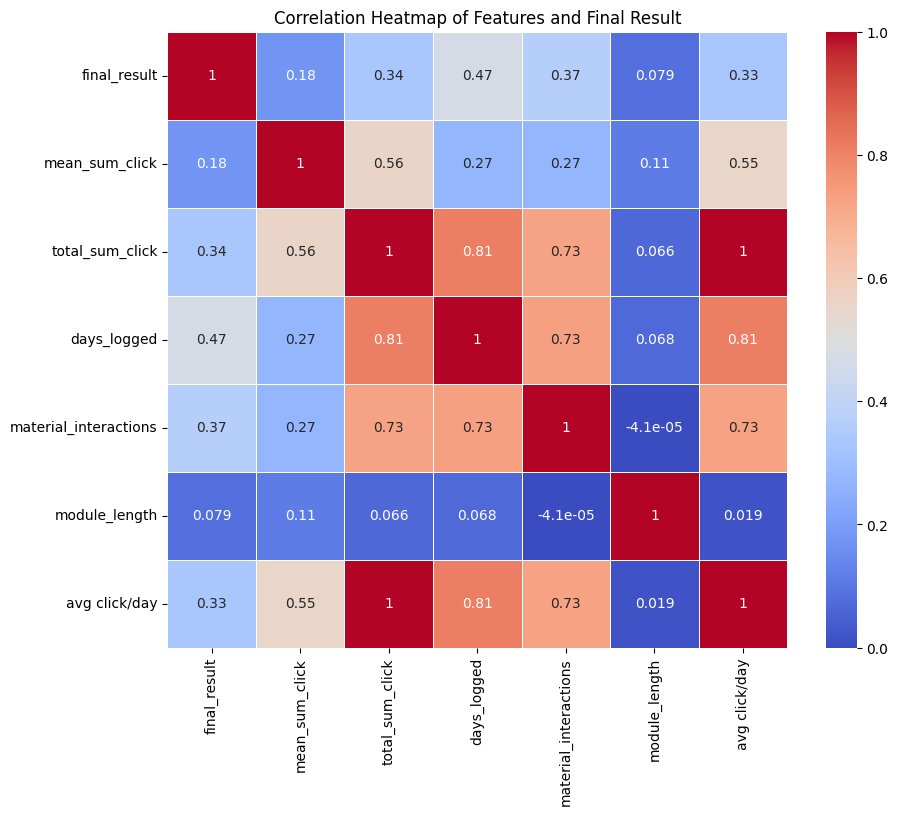

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Recalculating the correlation matrix as it might have been reset
correlation_matrix = df[['final_result', 'mean_sum_click', 'total_sum_click', 'days_logged', 'material_interactions', 'module_length', 'avg click/day']].corr()

# Recreating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Setting the title
plt.title('Correlation Heatmap of Features and Final Result')

# Display the heatmap
plt.show()


# Model Training 

## Supervised Learning 

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
y = df['final_result']

# Assuming you want to exclude 'final_result' from your features
X = df.drop('final_result', axis=1)

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (18978, 40)
Shape of y: (18978,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.8503688092729189


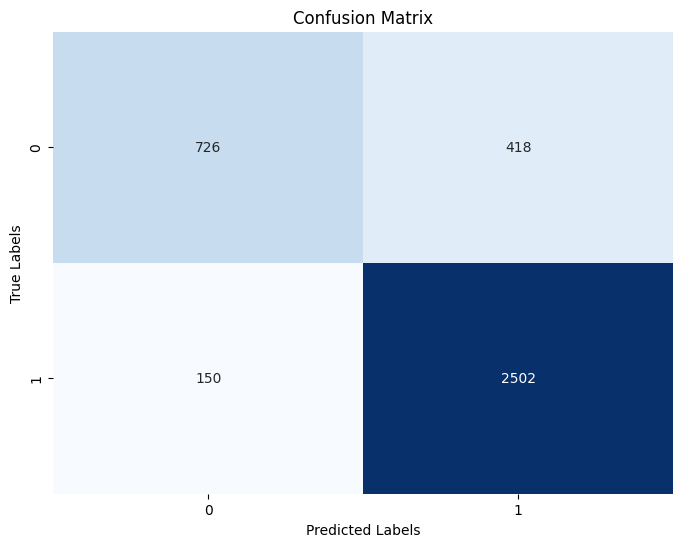

In [20]:
import matplotlib.pyplot as plt
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Get names of features
feature_names = X.columns

# Print the top k features and their importances
k = 40  # Number of top features to display
print("Top", k, "features:")
for i in range(k):
    print(f"{i+1}. {feature_names[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]:.4f}")

Top 40 features:
1. days_logged: 0.1543
2. % material interaction: 0.1212
3. avg click/day: 0.1152
4. total_sum_click: 0.1093
5. material_interactions: 0.1020
6. mean_sum_click: 0.0650
7. id_student: 0.0531
8. imd_band: 0.0329
9. id_site: 0.0275
10. studied_credits: 0.0206
11. highest_education: 0.0199
12. CMA: 0.0170
13. module_length: 0.0129
14. gender: 0.0113
15. code_module_BBB: 0.0107
16. TMA: 0.0100
17. age_band: 0.0097
18. num_of_prev_attempts: 0.0097
19. code_module_FFF: 0.0069
20. region_Scotland: 0.0063
21. disability: 0.0062
22. region_London Region: 0.0057
23. region_North Western Region: 0.0053
24. region_West Midlands Region: 0.0052
25. region_South Region: 0.0051
26. region_South West Region: 0.0049
27. region_Wales: 0.0048
28. code_presentation_2013J: 0.0047
29. region_East Midlands Region: 0.0045
30. code_presentation_2014B: 0.0044
31. region_South East Region: 0.0043
32. code_module_DDD: 0.0043
33. code_presentation_2014J: 0.0041
34. region_Yorkshire Region: 0.0040
35

In [22]:
sorted_indices[:10]

array([ 3,  8,  6,  2,  4,  1,  0, 14,  7, 17])

In [23]:
y_test

3398     1
24607    0
17732    0
5554     1
5922     1
        ..
6844     0
9258     1
20612    1
16648    1
24280    0
Name: final_result, Length: 3796, dtype: int64

# Splitting the data: 
The dataset is split into training (80%) and testing (20%) sets using train_test_split().
Logistic Regression: A Logistic Regression model is trained and evaluated for accuracy and classification report.
Random Forest: A Random Forest Classifier is also trained and evaluated similarly.



# Model Training 

# Logistic Regression 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['final_result', 'id_student'])  # Drop target and id_student
y = df['final_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8437829293993677
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1144
           1       0.86      0.92      0.89      2652

    accuracy                           0.84      3796
   macro avg       0.82      0.79      0.81      3796
weighted avg       0.84      0.84      0.84      3796



/home/sumudu/reseach_env/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8516859852476291
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1144
           1       0.86      0.94      0.90      2652

    accuracy                           0.85      3796
   macro avg       0.85      0.79      0.81      3796
weighted avg       0.85      0.85      0.85      3796



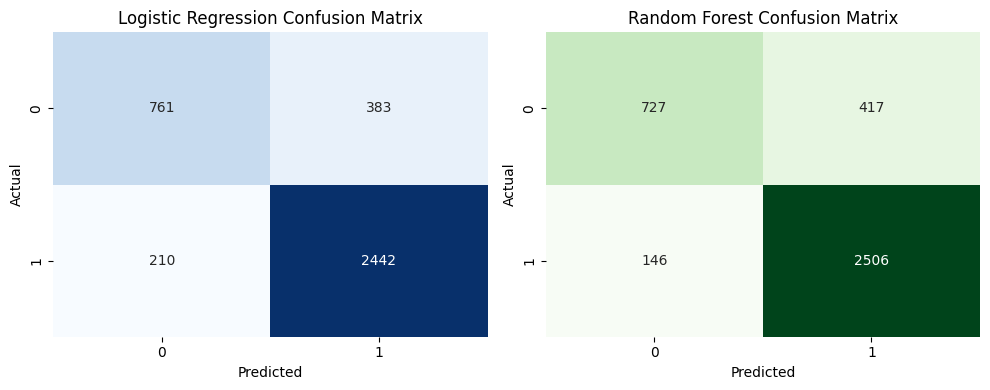

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrices for both models
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plotting the confusion matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()



# Unsupervised algorithms 

# K-Means Clustering 

/tmp/ipykernel_2981/1028320519.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, cmap='viridis')


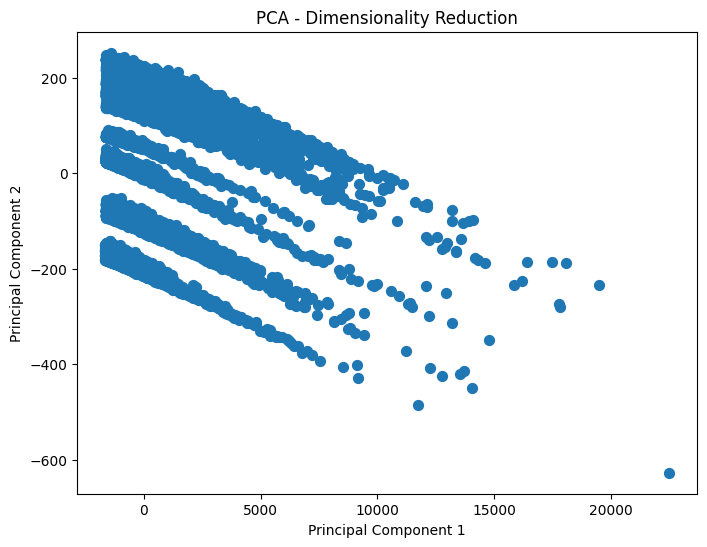

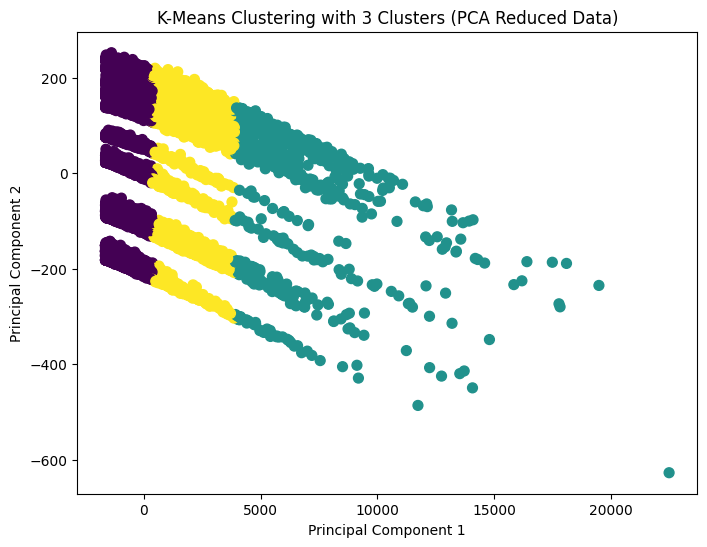

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Let's start with PCA to reduce the dimensions
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, cmap='viridis')
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Now applying K-Means clustering to the dataset
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume we want 3 clusters
kmeans.fit(X)

# Getting the cluster labels and plotting
clusters = kmeans.labels_

# Plot K-Means clusters using PCA-reduced data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('K-Means Clustering with 3 Clusters (PCA Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


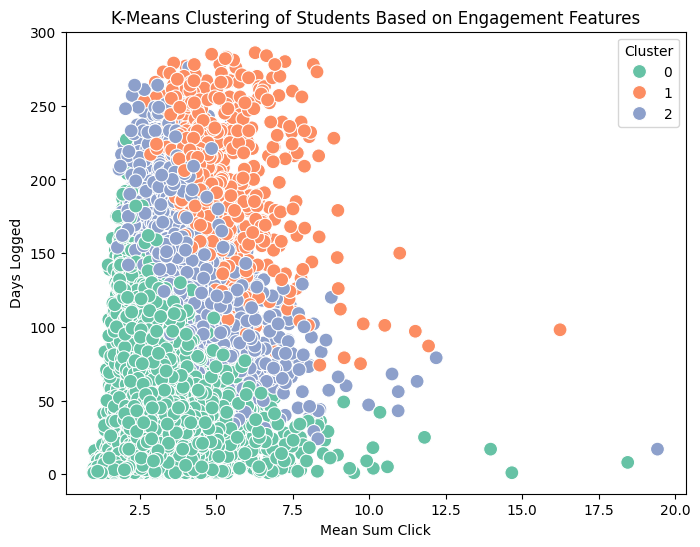

In [28]:
# Ensure the 'cluster' column exists and is correctly formatted
if 'cluster' not in df.columns:
    df['cluster'] = kmeans.labels_  # Reassign cluster labels if missing

# Now re-plot the scatter plot using 'mean_sum_click' and 'days_logged'
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean_sum_click', y='days_logged', hue='cluster', data=df, palette='Set2', s=100)
plt.title('K-Means Clustering of Students Based on Engagement Features')
plt.xlabel('Mean Sum Click')
plt.ylabel('Days Logged')
plt.legend(title='Cluster')
plt.show()



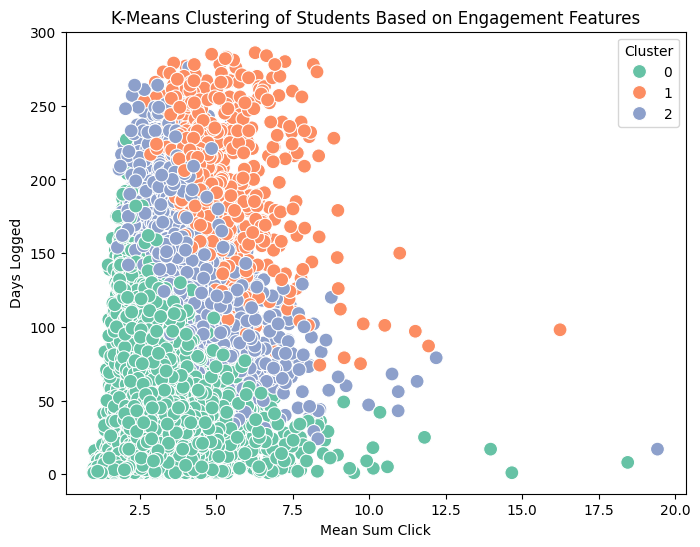

In [29]:
# Scatter plot of K-Means clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean_sum_click', y='days_logged', hue='cluster', data=df, palette='Set2', s=100)
plt.title('K-Means Clustering of Students Based on Engagement Features')
plt.xlabel('Mean Sum Click')
plt.ylabel('Days Logged')
plt.legend(title='Cluster')
plt.show()


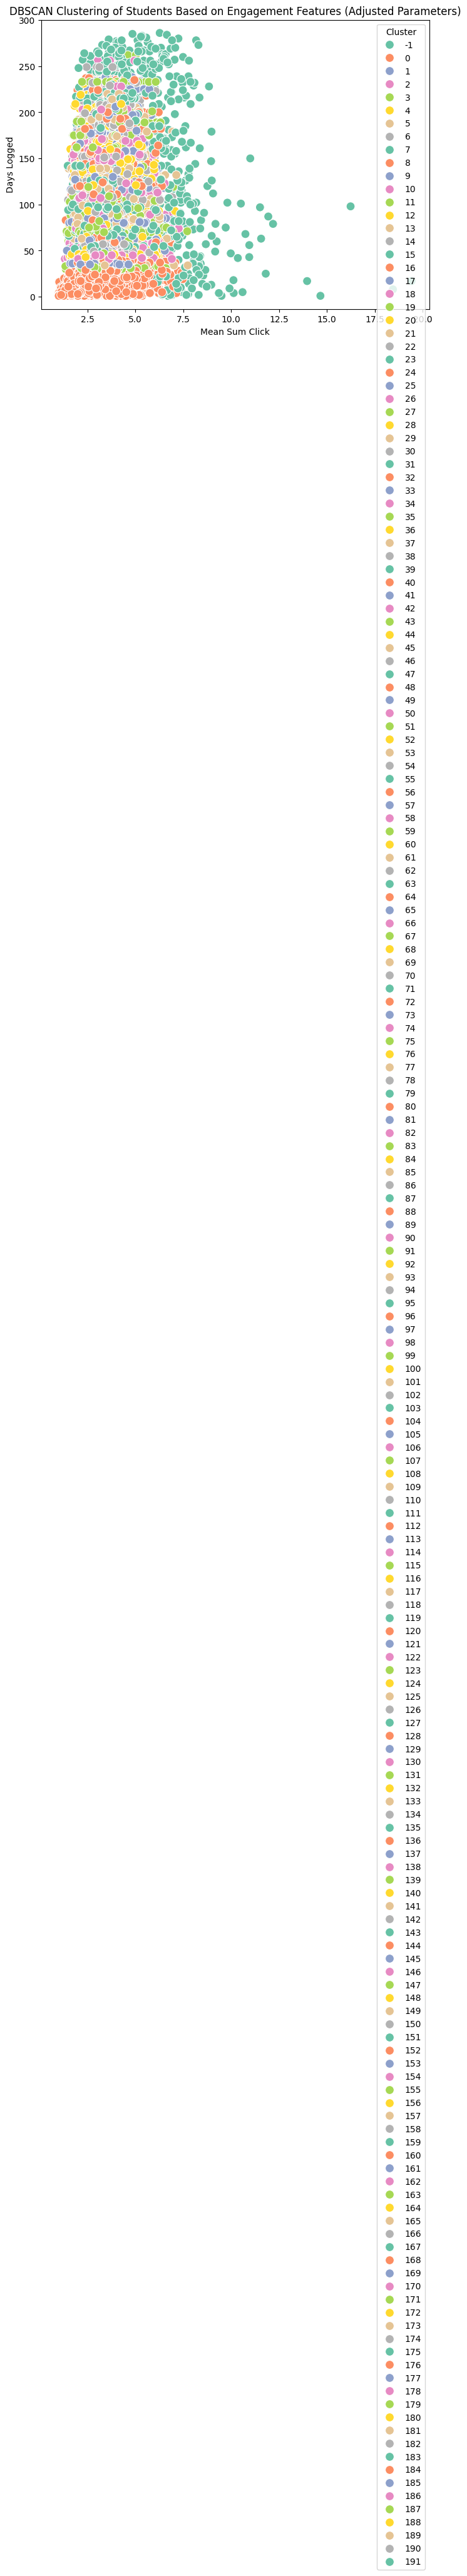

In [30]:
import pandas as pd
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt



# Assuming 'X' is the feature set you're using for clustering (replace with actual features)
X = df[['mean_sum_click', 'days_logged']]  # Example features, adjust based on your dataset


# Adjust DBSCAN parameters to better fit the data (eps is increased for wider clustering)
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjusted eps parameter
df['dbscan_cluster'] = dbscan.fit_predict(X)

# Visualize the DBSCAN clusters with adjusted parameters
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean_sum_click', y='days_logged', hue='dbscan_cluster', data=df, palette='Set2', s=100)
plt.title('DBSCAN Clustering of Students Based on Engagement Features (Adjusted Parameters)')
plt.xlabel('Mean Sum Click')
plt.ylabel('Days Logged')
plt.legend(title='Cluster')
plt.show()


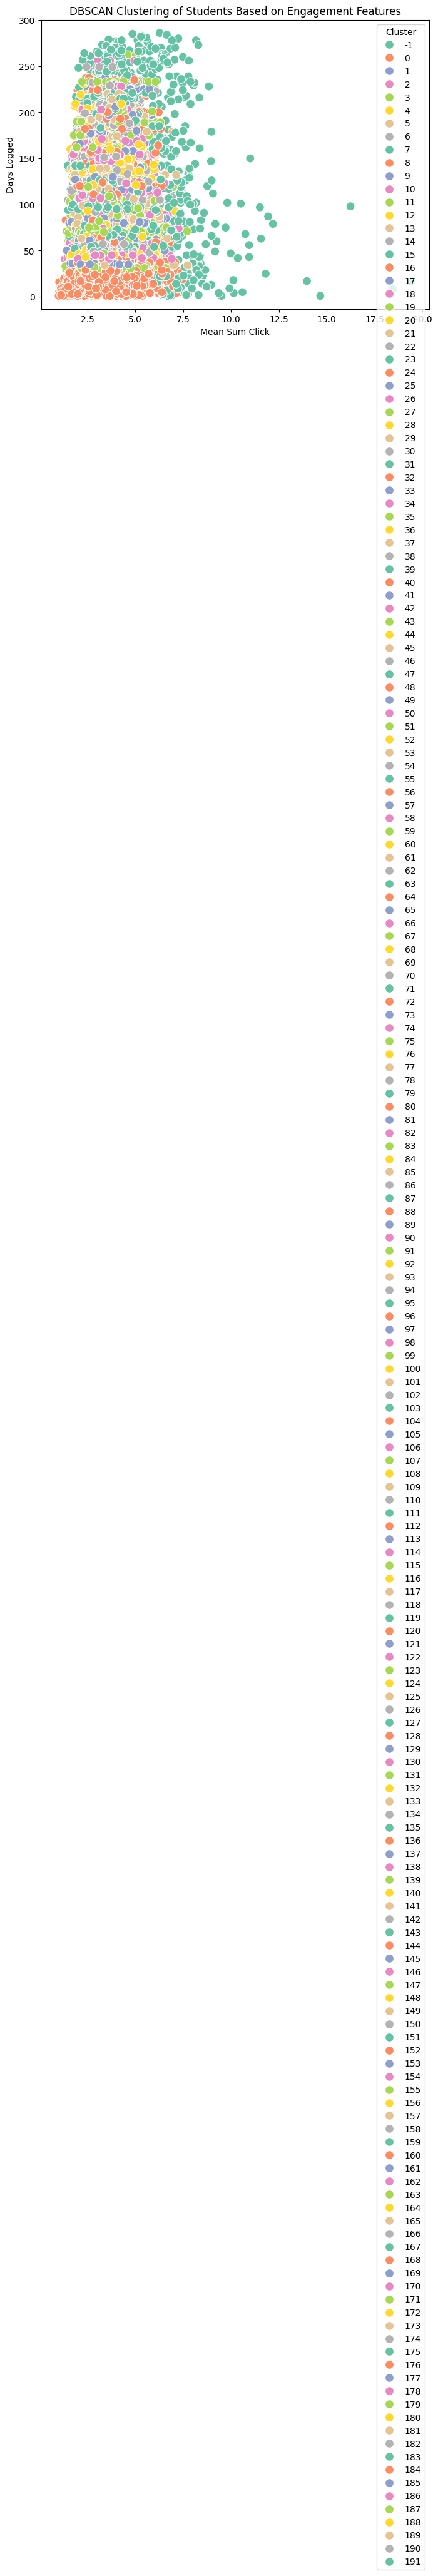

In [31]:
# Adjust DBSCAN parameters
dbscan = DBSCAN(eps=1.0, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)

# Visualize the DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean_sum_click', y='days_logged', hue='dbscan_cluster', data=df, palette='Set2', s=100)
plt.title('DBSCAN Clustering of Students Based on Engagement Features')
plt.xlabel('Mean Sum Click')
plt.ylabel('Days Logged')
plt.legend(title='Cluster')
plt.show()


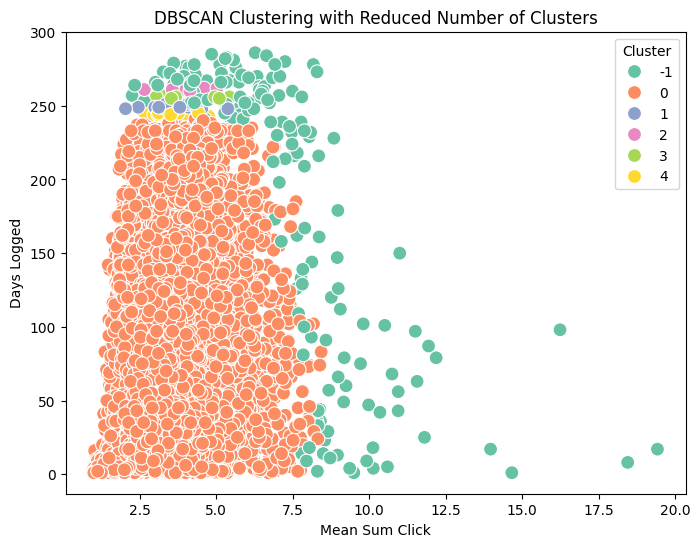

In [32]:
from sklearn.cluster import DBSCAN

# Adjusting the 'eps' and 'min_samples' to reduce the number of clusters
dbscan = DBSCAN(eps=1.5, min_samples=10)  # Increase eps, increase min_samples
df['dbscan_cluster'] = dbscan.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean_sum_click', y='days_logged', hue='dbscan_cluster', data=df, palette='Set2', s=100)
plt.title('DBSCAN Clustering with Reduced Number of Clusters')
plt.xlabel('Mean Sum Click')
plt.ylabel('Days Logged')
plt.legend(title='Cluster')
plt.show()


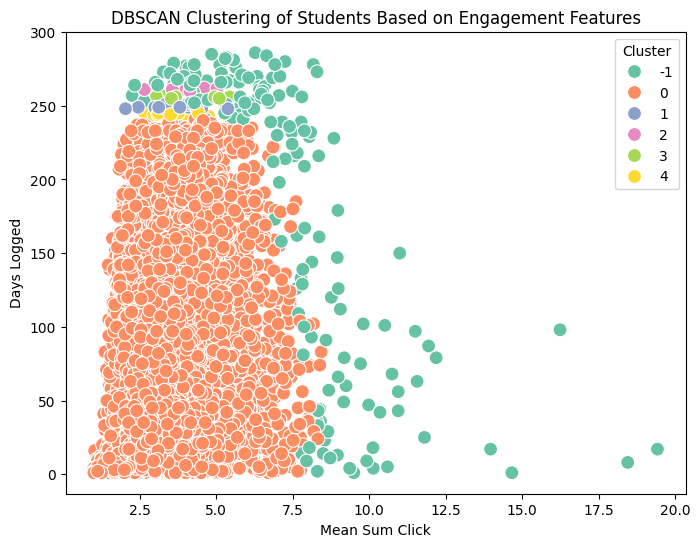

In [33]:
# Scatter plot of DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean_sum_click', y='days_logged', hue='dbscan_cluster', data=df, palette='Set2', s=100)
plt.title('DBSCAN Clustering of Students Based on Engagement Features')
plt.xlabel('Mean Sum Click')
plt.ylabel('Days Logged')
plt.legend(title='Cluster')
plt.show()


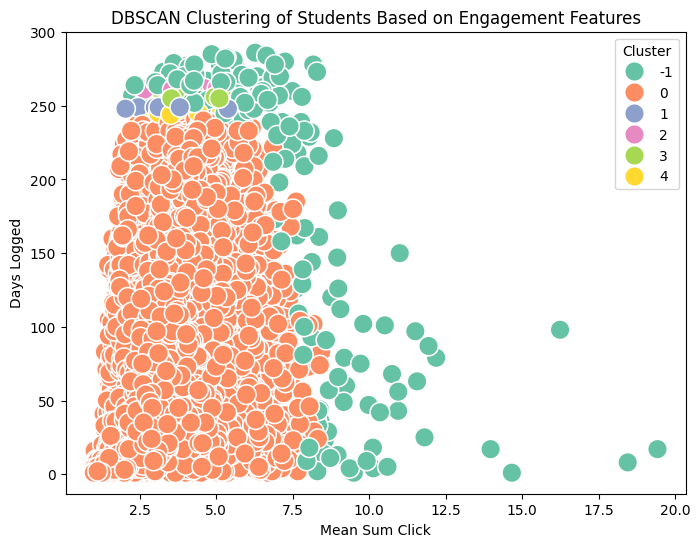

In [34]:
# Scatter plot of DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean_sum_click', y='days_logged', hue='dbscan_cluster', data=df, palette='Set2', s=200)
plt.title('DBSCAN Clustering of Students Based on Engagement Features')
plt.xlabel('Mean Sum Click')
plt.ylabel('Days Logged')
plt.legend(title='Cluster')
plt.show()


# Rainforcedment Learning 

## Q-Learning 

In [35]:
import numpy as np
import random

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration vs exploitation

# Number of states and actions (simplified example for educational purposes)
num_states = 10  # Example, number of learning progress states
num_actions = 5  # Example, number of learning activities

# Initialize Q-table with zeros (num_states x num_actions)
Q = np.zeros((num_states, num_actions))

# Define rewards for taking actions in certain states (example setup)
# Positive rewards for completing activities, negative for failing activities
rewards = np.random.randint(-10, 10, size=(num_states, num_actions))  # Random rewards for illustration

# Function to choose action based on epsilon-greedy strategy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return np.random.randint(0, num_actions)  # Explore: choose a random action
    else:
        return np.argmax(Q[state, :])  # Exploit: choose the best known action

# Function to update Q-values
def update_Q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state, :])
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

# Simulate Q-Learning
for episode in range(1000):  # Example of running through 1000 episodes
    state = np.random.randint(0, num_states)  # Random initial state
    done = False
    while not done:
        action = choose_action(state)  # Choose action
        next_state = np.random.randint(0, num_states)  # Transition to next state (example)
        reward = rewards[state, action]  # Get reward for action
        
        # Update Q-value
        update_Q(state, action, reward, next_state)
        
        # End if terminal state reached (can add conditions)
        if next_state == num_states - 1:  # Example condition for terminal state
            done = True
        state = next_state  # Move to the next state

# Show the learned Q-table
print("Learned Q-table:")
print(Q)


Learned Q-table:
[[42.27287506 55.56838339 45.18015041 47.15186088 66.60230841]
 [52.74934533 51.60102275 48.03814732 52.29482745 66.29341345]
 [47.06293898 49.30555851 50.50645256 55.25154835 66.61921401]
 [45.74504624 42.37941615 63.38167783 51.52473237 50.64826161]
 [53.85785482 45.26014361 66.69037555 55.35015051 46.68546903]
 [58.4980002  42.83014665 45.19302005 63.69644214 41.25761454]
 [46.27759065 67.83901377 43.69723949 45.50471421 60.01582212]
 [47.95323883 45.62988621 63.03434872 45.15429842 45.5034059 ]
 [63.95990177 46.89508343 51.98467542 51.91185835 51.85233263]
 [ 7.16243099 63.2280297  12.06443674  9.46614373 27.83459073]]
